<a href="https://colab.research.google.com/github/nourragain/trial/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Nourhan Emad

ID: 55-1773

Tutorial: 4

---

Name: Ahmed Saleh

ID: 55-0439

Tutorial: 4

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

Filtering selling price

Filtering odometer

Converting saledate data type

In [26]:
df.rename(columns={'sellingprice': 'sellingprice_in_$'}, inplace=True)
df['sellingprice_in_$'] = df['sellingprice_in_$'].replace('[$]', '', regex=True).astype(float)
df['odometer'] = df['odometer'].replace('[m,i]', '', regex=True).astype(float)
df['saledate'] = df['saledate'].str.split().str[:4].str.join(' ')
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
df['sellingprice_in_$'] = df['sellingprice_in_$'].replace('[$]', '', regex=True).astype(float)



Grouping body types

In [ ]:
import re

def map_body_type(body):
    if re.search(r'\b(minivan|van)\b', body, re.IGNORECASE):
        return 'Minivan'

    if re.search(r'\bcoupe\b', body, re.IGNORECASE):
        return 'Coupe'
    if re.search(r'\bconvertible\b', body, re.IGNORECASE):
        return 'Convertible'
    if re.search(r'\bhatchback\b', body, re.IGNORECASE):
        return 'Hatchback'
    if re.search(r'\bwagon\b', body, re.IGNORECASE):
        return 'Wagon'
    if re.search(r'\bsuv\b', body, re.IGNORECASE):
        return 'SUV'
    if re.search(r'\bsedan\b', body, re.IGNORECASE):
        return 'Sedan'
    if re.search(r'\bpickup truck\b', body, re.IGNORECASE):
        return 'Pickup Truck'
    if re.search(r'\bcab\b|\bvan\b', body, re.IGNORECASE):
        return 'Pickup Truck'
    if re.search(r'\bsupercrew\b', body, re.IGNORECASE):
        return 'Pickup Truck'
    if re.search(r'\bsupercab\b', body, re.IGNORECASE):
        return 'Pickup Truck'
    if re.search(r'\bKoup\b', body, re.IGNORECASE):
        return 'Coupe'
    if re.search(r'\bxtracab\b', body, re.IGNORECASE):
        return 'Pickup Truck'
    return body


df['body'] = df['body'].apply(map_body_type)
unique_makes = df['body'].unique()
unique_makes


array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

Filling missing data in color and interior by replacing it with the most repeated color and interior in the same body type

In [ ]:
most_repeated_interior = df.groupby('body')['interior'].agg(lambda x: x.value_counts().idxmax())
for body, common_interior in most_repeated_interior.items():
    df.loc[(df['body'] == body) & (df['interior'] == '—'), 'interior'] = common_interior


most_repeated_color = df.groupby('body')['color'].agg(lambda x: x.value_counts().idxmax())
for body, common_color in most_repeated_color.items():
    df.loc[(df['body'] == body) & (df['color'] == '—'), 'color'] = common_color




## Requirements

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

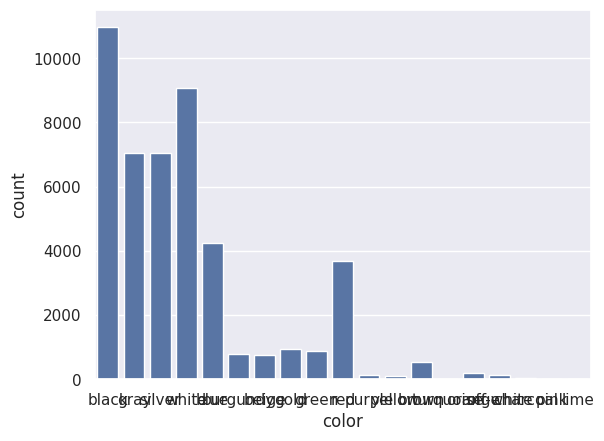

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

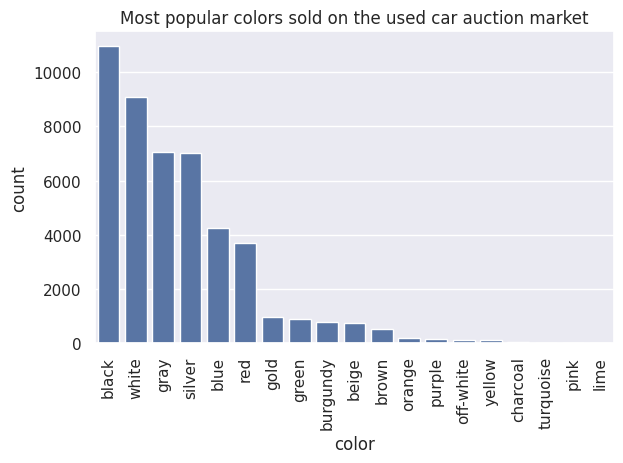

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**



**Visualization**

[Text(0.5, 1.0, 'Most popular cars sold on the used car auction market')]

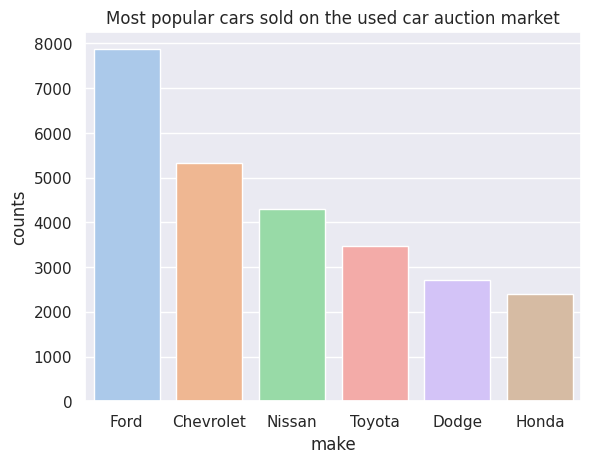

In [ ]:
values = df['make'].value_counts().head(6)
values_df = values.reset_index()
values_df.columns = ['make', 'counts']

sns.barplot(x='make', y='counts', data=values_df, palette='pastel', hue='make').set(title='Most popular cars sold on the used car auction market')

**Answer for Q1**: The most popular car brand is Ford. The second most popular car brand is Chevrolet, followed closely by Nissan, then Toyota. The difference in popularity between Ford and Chevrolet is much bigger than the difference between Chevrolet and Nissan. Meaning Chevrolet and Nissan and closer in popularity than Chevrolet and Ford.

1-Ford

2-Chevrolet

3-Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**



**Visualization**

[Text(0.5, 1.0, 'Average price for automatic and manual used cars')]

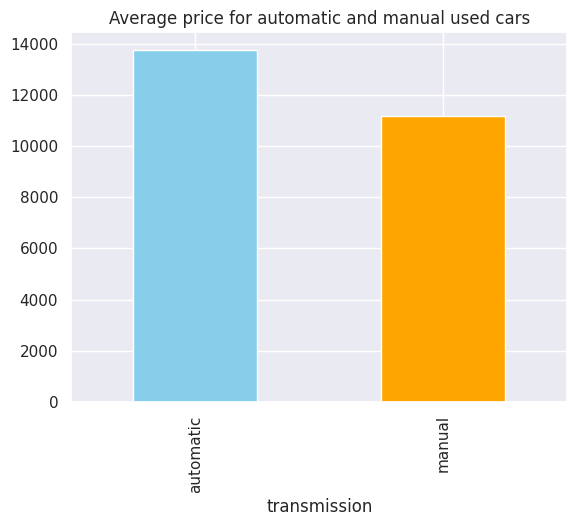

In [ ]:
grouped = df.groupby('transmission')['sellingprice_in_$'].mean()

grouped.plot(kind='bar', color=['skyblue', 'orange']).set(title='Average price for automatic and manual used cars')


**Answer for Q2**: Yes, the bar chart indicates that automatic transmission cars, on average, sell for higher than manual transmisson cars. This could be an indicator of general consumer's preference. It may show that consumers lean more towards comfort and convenience. However, more data would be needed to analyze it more appropriately, such as price, year, mileage or model.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

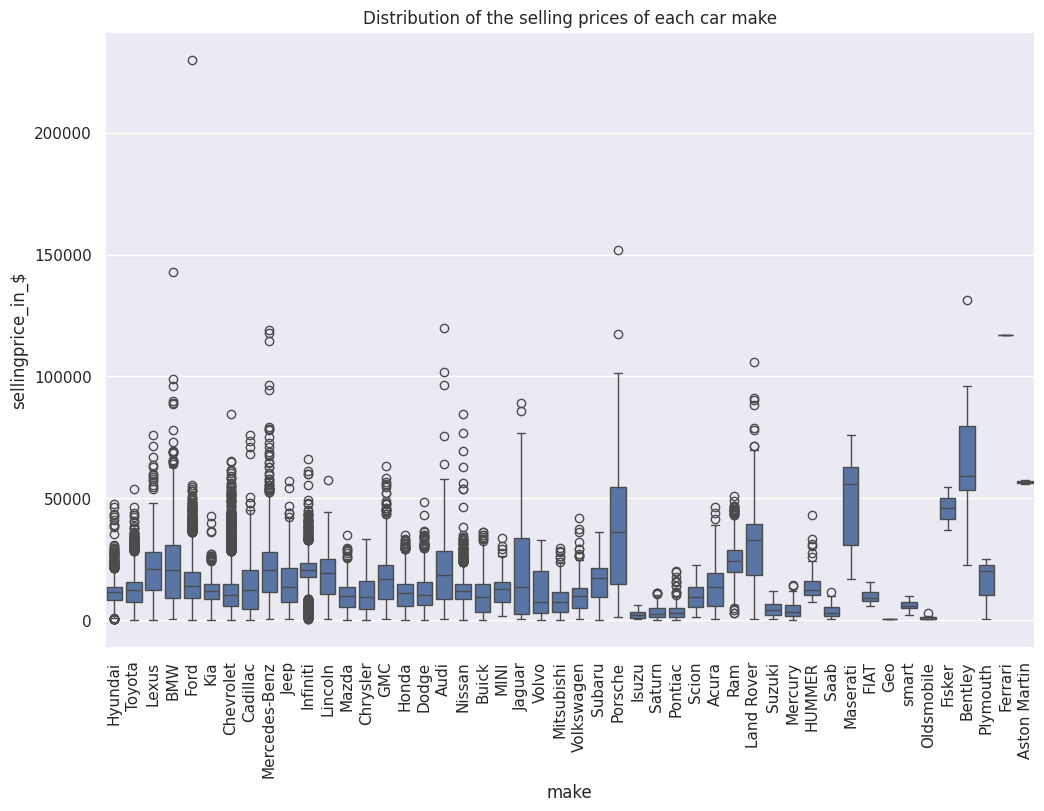

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='make', y='sellingprice_in_$', data=df).set(title='Distribution of the selling prices of each car make')

plt.xticks(rotation=90)

plt

**Answer for Q3**: Porch and Jaguar have the widest selling distribution. A wider box indicates a larger IQR (biggest diffrence between q3 and q1), meaning the prices of that car make are more spread out. The whiskers extend from the box to the minimum and maximum values, excluding outliers. Longer whiskers indicate a larger range of prices. Ferrari and Porch have the most expensive prices, as they both have the highest whiskers.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

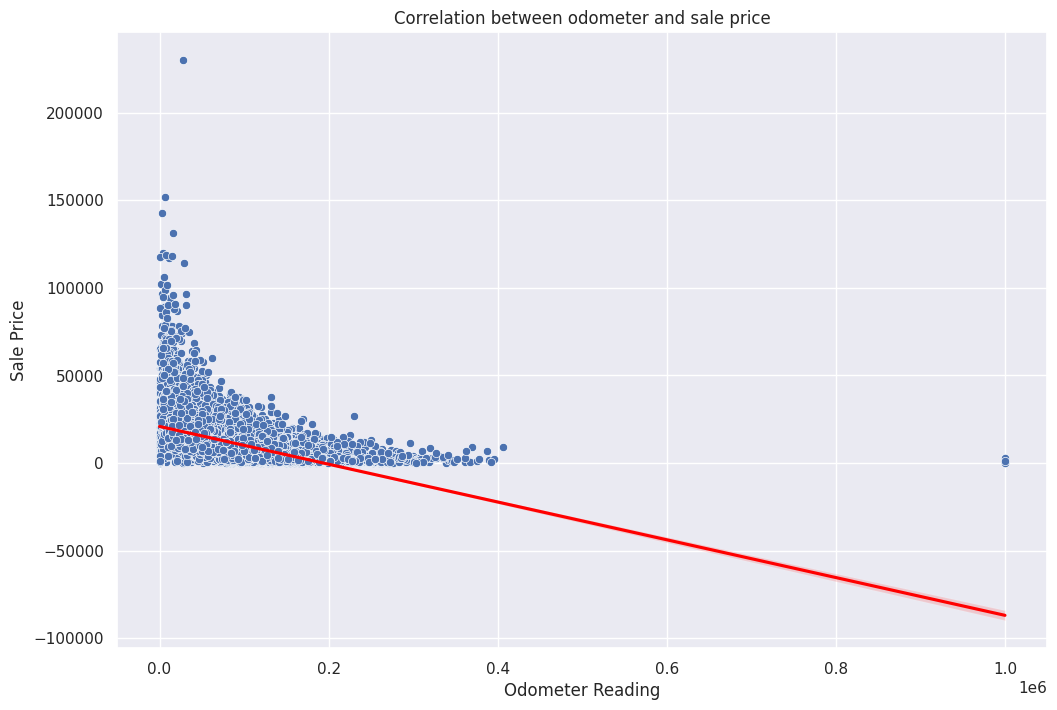

The correlation coefficient between odometer and selling price is: -0.5809


In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='odometer', y='sellingprice_in_$', data=df)
sns.regplot(x='odometer', y='sellingprice_in_$', data=df, scatter=False, color='red').set(title='Correlation between odometer and sale price')

plt.xlabel('Odometer Reading')
plt.ylabel('Sale Price')
plt.show()

correlation_coefficient = df['odometer'].corr(df['sellingprice_in_$'])
print(f"The correlation coefficient between odometer and selling price is: {correlation_coefficient:.4f}")


**Answer for Q4**: The scatter plot shows a clear negative correlation between the odometer reading (mileage) and the car's sale price. This means that as the odometer reading increases (i.e., the car has more mileage), the sale price tends to decrease. To obtain a better understanding of this, we calculated the correlation coefficient between odometer and the selling price and the result of -0.58 showed a moderate inverse relation between both variables where an increase in one of them means a decrease in the other.


**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

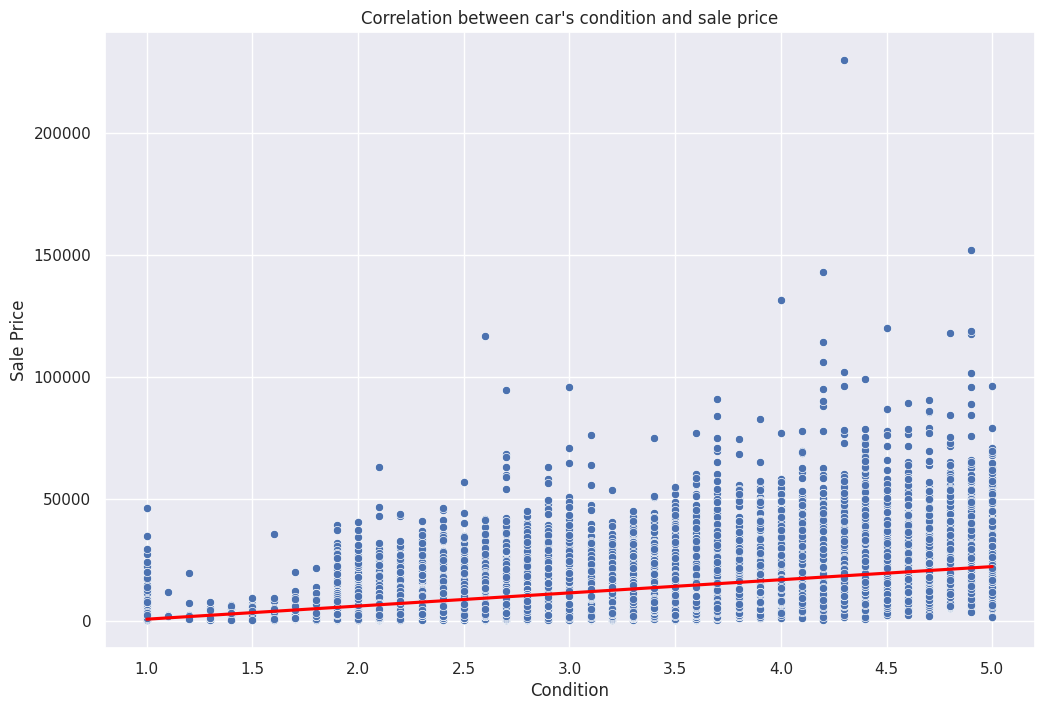

The correlation coefficient between condition and selling price is: 0.5291


In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='condition', y='sellingprice_in_$', data=df)
sns.regplot(x='condition', y='sellingprice_in_$', data=df, scatter=False, color='red').set(title="Correlation between car's condition and sale price")

plt.xlabel('Condition')
plt.ylabel('Sale Price')
plt.show()

correlation_coefficient = df['condition'].corr(df['sellingprice_in_$'])
print(f"The correlation coefficient between condition and selling price is: {correlation_coefficient:.4f}")

**Answer for Q5**: The scatter plot shows a clear positive correlation between the car's condition and the car's selling price. We calculated the correlation coefficient between the condition and the selling price and we obtained a result of 0.529, which also indicated a moderate positive correlation. This means that an increase in one of those variables (car condition or car selling price) would likely cause an increase in the other.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

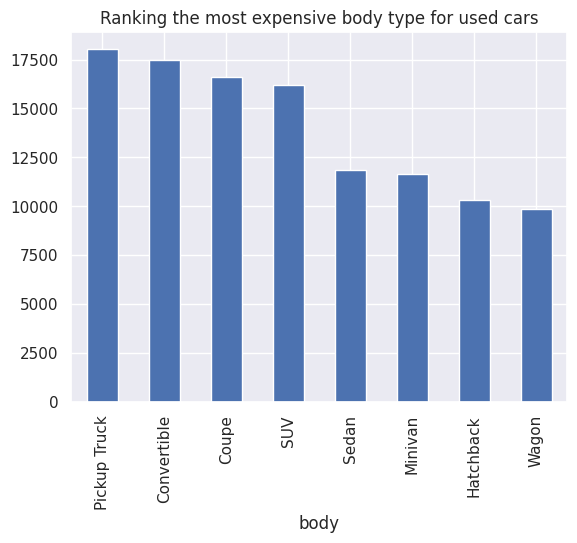

In [ ]:
grouped = df.groupby('body')['sellingprice_in_$'].mean()

ranked = grouped.sort_values(ascending=False)

most_expensive = ranked.index[0]
least_expensive = ranked.index[-1]

ranked.plot(kind='bar').set(title='Ranking the most expensive body type for used cars')

plt.show()



**Answer for Q6**: Yes, there are differences in the average car price due to the car's body type. On average, the most expensive type is Pickup Truck (around $17,500), while the least expensive is Wagon.
Ranking them from most expensive to least expensive:

1- Pickup truck

2- Convertible

3- Coupe

4- SUV

5- Sedan

6- Minivan

7- Hatchback

8- Wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

Finding correlation between columns

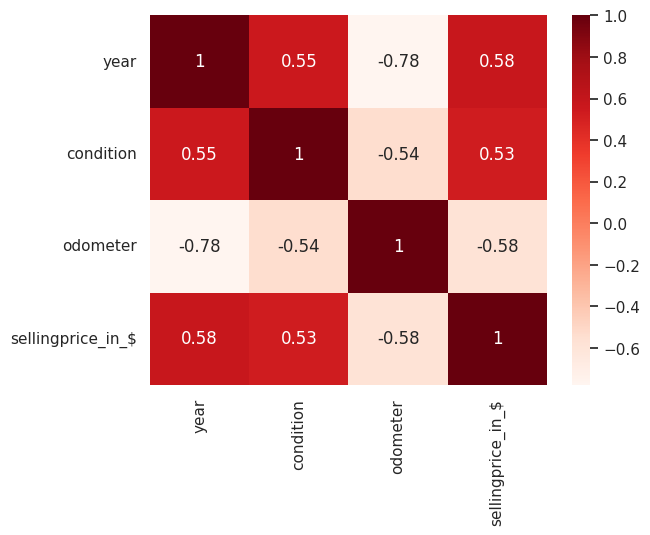

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Reds');


Normalizing some columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['year', 'odometer']

df[columns_to_normalize] = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

Encoding some columns

In [ ]:
df['salegday'] = df['saledate'].dt.day
df['salemonth'] = df['saledate'].dt.month
df['saleyear'] = df['saledate'].dt.year
df.drop(columns=['saledate'], inplace=True)

columns_to_encode = ['make', 'model', 'trim', 'body', 'transmission' , 'color', 'interior', 'seller', 'state']
for column in columns_to_encode:
    df_encoded = pd.get_dummies(df, columns=[column], prefix='', prefix_sep='')
    df = df_encoded

## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['vin', 'sellingprice_in_$'])
y = df['sellingprice_in_$']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
r2

12547897.354034787


0.8647421237655026

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.